In [14]:
%env PATH=$PATH:/Library/TeX/texbin/:/opt/homebrew/Caskroom/miniforge/base/envs/book/bin/

env: PATH=$PATH:/Library/TeX/texbin/:/opt/homebrew/Caskroom/miniforge/base/envs/book/bin/


In [15]:
%load_ext jupyter_tikz 

The jupyter_tikz extension is already loaded. To reload it, use:
  %reload_ext jupyter_tikz


In [16]:
%%tikz -l positioning,calc,arrows --save-image=ex1.svg
\begin{tikzpicture}[auto, node distance=3.5cm,>=latex']

	\tikzstyle{block} = [draw, fill=white, rectangle, minimum height=3em, minimum width=6em]
	\tikzstyle{input} = [coordinate]
	\tikzstyle{output} = [coordinate]
	\tikzstyle{pinstyle} = [pin edge={to-,thin,black}]
	
    \node [input, name=input] {};
    \node [block, right of=input] (controller) { \Large $\frac{90}{s+100}$};
    \node [block, right of=controller, node distance=4.5cm] (system) {\Large $\frac{5}{s+0.2}$};

    \draw [->] (controller) -- node[name=u] {Current} (system);
    \node [output, right of=system] (output) {};

    \draw [->] (input) -- node {Voltage} (controller);
    \draw [->] (system) -- node [name=y] {Speed}(output);
\end{tikzpicture}


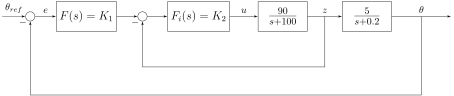

In [17]:
%%tikz -l positioning,calc,arrows --save-image=ex1-sol1.svg
\begin{tikzpicture}[auto, node distance=3cm,>=latex']

	\tikzstyle{block} = [draw, fill=white, rectangle, minimum height=3em, minimum width=5em]
	\tikzstyle{sum} = [draw, fill=white, circle, node distance=1cm]
	\tikzstyle{input} = [coordinate]
	\tikzstyle{output} = [coordinate]
	\tikzstyle{pinstyle} = [pin edge={to-,thin,black}]
	
    \node [input, name=input] {};
    \node [sum, right of=input] (sum1) {};
    \node [block, right of=sum1, node distance=2cm] (controller1) { \large $F(s) = K_1$};
    \node [sum, right of=controller1, node distance=2cm] (sum2) {};
    \node [block, right of=sum2, node distance=2cm] (controller2) {\large $F_i(s) = K_2$};
    \node [block, right of=controller2] (system2) { \Large $\frac{90}{s+100}$};
    \node [block, right of=system2, node distance=3cm] (system1) {\Large $\frac{5}{s+0.2}$};

    \draw [->] (controller2) -- node[name=u] {$u$} (system2);
    \draw [->] (system2) -- node[name=z] {$z$} (system1);
    \node [output, right of=system1] (output) {};
    \coordinate [below of=z, node distance=3cm] (meas1);
    \coordinate [below of=u, node distance=2cm] (meas2);

    \draw [draw,->] (input) -- node {$\theta_{ref}$} (sum1);
    \draw [->] (sum1) -- node {$e$} (controller1);
    \draw [->] (system1) -- node [name=y] {$\theta$}(output);
    \draw [->] (controller1) -- (sum2);
    \draw [->] (sum2) -- (controller2);
    \draw [->] (y) |- (meas1) -| node[pos=0.99] {$-$}  (sum1);
    \draw [->] (z) |- (meas2) -| node[pos=0.99] {$-$}  (sum2);
\end{tikzpicture}


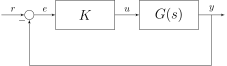

In [18]:
%%tikz -l positioning,calc,arrows --save-image=ex0-block.svg
\begin{tikzpicture}[auto, node distance=2cm,>=latex']

	\tikzstyle{block} = [draw, fill=white, rectangle, minimum height=3em, minimum width=6em]
	\tikzstyle{sum} = [draw, fill=white, circle, node distance=1cm]
	\tikzstyle{input} = [coordinate]
	\tikzstyle{output} = [coordinate]
	\tikzstyle{pinstyle} = [pin edge={to-,thin,black}]
	
    \node [input, name=input] {};
    \node [sum, right of=input] (sum) {};
    \node [block, right of=sum] (controller) { \Large $K$};
    \node [block, right of=controller, node distance=3cm] (system) {\Large $G(s)$};

    \draw [->] (controller) -- node[name=u] {$u$} (system);
    \node [output, right of=system] (output) {};
    \coordinate [below of=u] (measurements);

    \draw [draw,->] (input) -- node {$r$} (sum);
    \draw [->] (sum) -- node {$e$} (controller);
    \draw [->] (system) -- node [name=y] {$y$}(output);
    \draw [->] (y) |- (measurements) -| node[pos=0.99] {$-$}  (sum);
\end{tikzpicture}


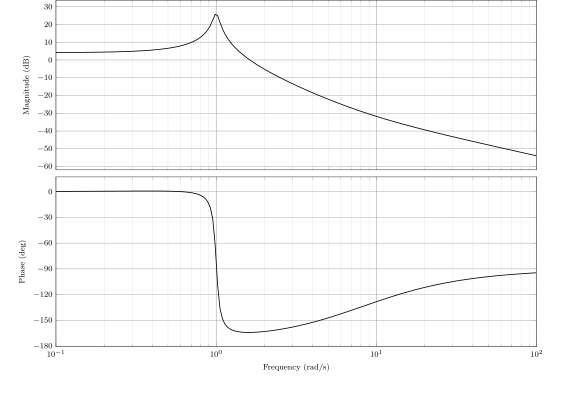

In [19]:
%%tikz -as=full-document -tp=lualatex --save-image=ex0-bode.svg
\documentclass{article}
\usepackage[pgf]{bodeplot}
\usepackage[paperwidth=20cm, paperheight=14cm, margin=0cm]{geometry}


\begin{document}
\BodeZPK[%
	plot/mag/{black,thick},
	plot/ph/{black,thick},
	axes/mag/{ytick distance=10, width=17cm, height=6cm, ylabel=Magnitude (dB)},
	axes/ph/{ytick distance=30, width=17cm, height=6cm},
]{%
	z/{-8},
	p/{{-0.04,-1},{-0.04,1}},
	k/0.2,
}
{0.1}
{100}
\end{document}

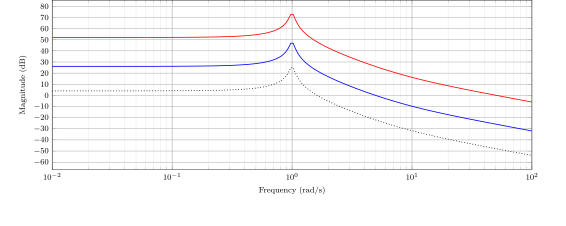

In [20]:
%%tikz -as=full-document -tp=lualatex --save-image=ex0-bode-sol-mag.svg
\documentclass{article}
\usepackage[pgf]{bodeplot}
\usepackage[paperwidth=20cm, paperheight=8cm, margin=0cm]{geometry}


\begin{document}

\begin{BodeMagPlot}[ytick distance=10, width=17cm, height=6cm, ylabel=Magnitude (dB)] {0.01} {100}
    \addBodeZPKPlots[%
    true/{black,thick, dotted}]
    {magnitude}
    {z/{-8},
	p/{{-0.04,-1},{-0.04,1}},
	k/0.2}
    \addBodeZPKPlots[%
    true/{red,thick}]
    {magnitude}
    {z/{-8},
	p/{{-0.04,-1},{-0.04,1}},
	k/50}
    \addBodeZPKPlots[%
    true/{blue,thick}]
    {magnitude}
    {z/{-8},
	p/{{-0.04,-1},{-0.04,1}},
	k/2.52}
\end{BodeMagPlot}
\end{document}

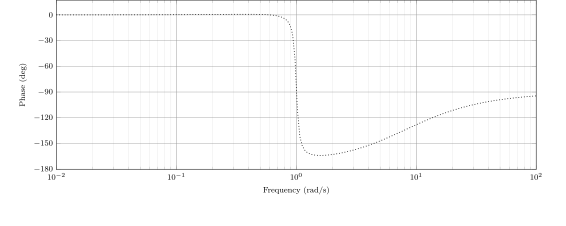

In [21]:
%%tikz -as=full-document -tp=lualatex --save-image=ex0-bode-sol-phase.svg

\documentclass{article}
\usepackage[pgf]{bodeplot}
\usepackage[paperwidth=20cm, paperheight=8cm, margin=0cm]{geometry}


\begin{document}
\begin{BodePhPlot}[ytick distance=30, width=17cm, height=6cm] {0.01} {100}
    \addBodeZPKPlots[%
    true/{black,thick, dotted}]
    {phase}
    {z/{-8},
	p/{{-0.04,-1},{-0.04,1}},
	k/0.2}
\end{BodePhPlot}
\end{document}


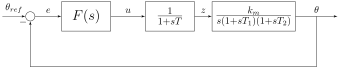

In [22]:
%%tikz -l positioning,calc,arrows --save-image=ex2.svg
\begin{tikzpicture}[auto, node distance=3cm,>=latex']

	\tikzstyle{block} = [draw, fill=white, rectangle, minimum height=3em, minimum width=5em]
	\tikzstyle{sum} = [draw, fill=white, circle, node distance=1cm]
	\tikzstyle{input} = [coordinate]
	\tikzstyle{output} = [coordinate]
	\tikzstyle{pinstyle} = [pin edge={to-,thin,black}]
	
    \node [input, name=input] {};
    \node [sum, right of=input] (sum) {};
    \node [block, right of=sum, node distance=2cm] (controller) { \Large $F(s)$};
    \node [block, right of=controller] (actuator) { \Large $\frac{1}{1+sT}$};
    \node [block, right of=actuator, node distance=3cm] (system) {\Large $\frac{k_m}{s(1+sT_1)(1+sT_2)}$};

    \draw [->] (controller) -- node[name=u] {$u$} (actuator);
    \draw [->] (actuator) -- node[name=z] {$z$} (system);
    \node [output, right of=system] (output) {};
    \coordinate [below of=u, node distance=2cm] (measurements);

    \draw [draw,->] (input) -- node {$\theta_{ref}$} (sum);
    \draw [->] (sum) -- node {$e$} (controller);
    \draw [->] (system) -- node [name=y] {$\theta$}(output);
    \draw [->] (y) |- (measurements) -| node[pos=0.99] {$-$}  (sum);
\end{tikzpicture}


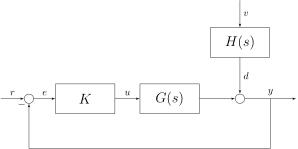

In [ ]:
%%tikz -l positioning,calc,arrows --save-image=ex3-block.svg
\begin{tikzpicture}[auto, node distance=2cm,>=latex']

    \tikzstyle{block} = [draw, fill=white, rectangle, minimum height=3em, minimum width=6em]
    \tikzstyle{sum} = [draw, fill=white, circle, node distance=1cm]
    \tikzstyle{input} = [coordinate]
    \tikzstyle{output} = [coordinate]
    
    % Nodes
    \node [input, name=input] {};
    \node [sum, right of=input] (sum) {};
    \node [block, right of=sum] (controller) { \Large $K$};
    \node [block, right of=controller, node distance=3cm] (system) {\Large $G(s)$};
    
    % Disturbance Nodes
    \node [sum, right of=system, node distance=2.5cm] (sum2) {};
    \node [block, above of=sum2, node distance=2cm] (dist_tf) {\Large $H(s)$};
    \node [input, above of=dist_tf, node distance=1.5cm] (v_in) {};

    % Output Node
    \node [output, right of=sum2, node distance=2cm] (output) {};

    % Connections
    \draw [->] (input) -- node {$r$} (sum);
    \draw [->] (sum) -- node {$e$} (controller);
    \draw [->] (controller) -- node {$u$} (system);
    \draw [->] (system) -- (sum2);
    
    % Disturbance path
    \draw [->] (v_in) -- node {$v$} (dist_tf);
    \draw [->] (dist_tf) -- node {} (sum2);
    
    % Final output and feedback
    \draw [->] (sum2) -- node [name=y] {$y$} (output);
    \draw [->] (y) |- ++(0,-2) -| node[pos=0.99] {$-$} (sum);

\end{tikzpicture}

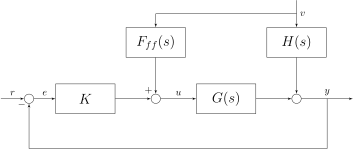

In [29]:
%%tikz -l positioning,calc,arrows --save-image=ex3-block-ff.svg
\begin{tikzpicture}[auto, node distance=2cm,>=latex']

    \tikzstyle{block} = [draw, fill=white, rectangle, minimum height=3em, minimum width=6em]
    \tikzstyle{sum} = [draw, fill=white, circle, node distance=1cm]
    \tikzstyle{input} = [coordinate]
    \tikzstyle{output} = [coordinate]
    
    % --- Nodes ---
    \node [input, name=input] {};
    \node [sum, right of=input] (sum_err) {};
    \node [block, right of=sum_err] (controller) {\Large $K$};
    
    % Summing junction for u (Feedback + Feedforward)
    \node [sum, right of=controller, node distance=2.5cm] (sum_u) {};
    
    \node [block, right of=sum_u, node distance=2.5cm] (system) {\Large $G(s)$};
    
    % Disturbance Nodes
    \node [sum, right of=system, node distance=2.5cm] (sum_y) {};
    \node [block, above of=sum_y, node distance=2cm] (dist_tf) {\Large $H(s)$};
    \node [input, above of=dist_tf, node distance=1.5cm] (v_in) {};
    
    % Feedforward Controller
    % Positioned between v_in and sum_u
    \node [block] at ($(sum_u) + (0,2)$) (ff_controller) {\Large $F_{ff}(s)$};

    % Output Node
    \node [output, right of=sum_y, node distance=2cm] (output) {};

    % --- Connections ---
    \draw [->] (input) -- node {$r$} (sum_err);
    \draw [->] (sum_err) -- node {$e$} (controller);
    \draw [->] (controller) -- (sum_u);
    \draw [->] (sum_u) -- node {$u$} (system);
    \draw [->] (system) -- (sum_y);
    
    % Disturbance path
    \draw [->] (v_in) -- node(v_point) {$v$} (dist_tf);
    \draw [->] (dist_tf) -- node {} (sum_y);
    
    % Feedforward path
    \draw [->] (v_point) -| (ff_controller);
    % Changed (ff_controller) to (ff_controller.south) to start from the edge
    \draw [->] (ff_controller.south) -- node[pos=0.9, left] {$+$} (sum_u);
    
    % Final output and feedback
    \draw [->] (sum_y) -- node [name=y] {$y$} (output);
    \draw [->] (y) |- ++(0,-2) -| node[pos=0.99] {$-$} (sum_err);

\end{tikzpicture}